### Leitura dos dados

In [2]:
import numpy as np
import pandas as pd

url = 'data/citrus.csv'
df = pd.read_csv(url)
columns_to_use = np.arange(1, len(df.columns), 1)

data = np.loadtxt(url, usecols=columns_to_use, delimiter=',', skiprows=1)

#### Avaliando o peso e diâmetro das laranjas e toranjas

##### Gerando arrays para o peso e diâmetro

In [3]:
orange_weight = data[:5000, 1]
orange_diameter = data[:5000,0]

grapefruit_weight = data[5000:,1]
grapefruit_diameter = data[5000:,0]

##### Visualizando no gráfico

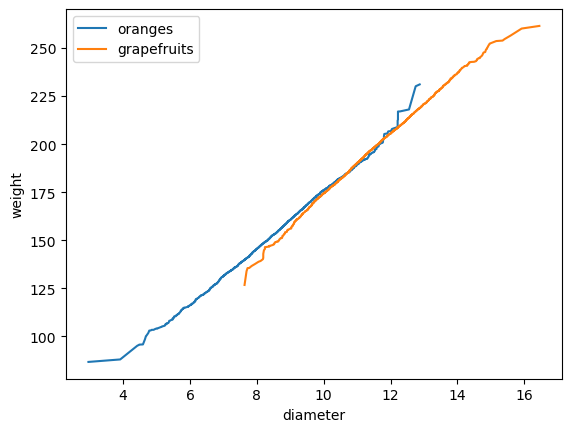

In [4]:
import matplotlib.pyplot as plt

plt.plot(orange_diameter,orange_weight, label='oranges')
plt.plot(grapefruit_diameter,grapefruit_weight, label='grapefruits')
plt.legend()
plt.xlabel('diameter')
plt.ylabel('weight')
plt.show()

#### Relação entre e peso e diâmentro e normalização

##### Coeficiente angular e linear da laranja

In [66]:
y = orange_weight
x = orange_diameter
n = np.size(orange_weight)

a = (n*np.sum(x*y) - np.sum(x)*np.sum(y)) / (n*np.sum(x**2) - np.sum(x)**2)

b = np.mean(y) - a*np.mean(x)

y_orange = a*x + b

array([ 71.1928497 ,  85.25260767,  92.80047774, ..., 213.12240647,
       216.08235552, 217.85832495])

##### Gráfico das laranjas com a normalização

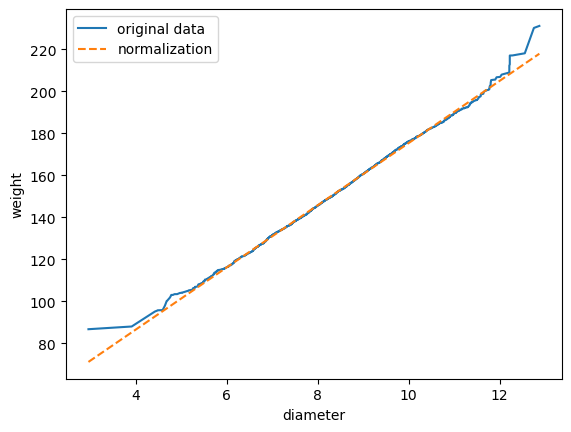

In [67]:
plt.plot(orange_diameter,orange_weight, label='original data')
plt.plot(orange_diameter, y_orange, linestyle = 'dashed', label='normalization')
plt.legend()
plt.xlabel('diameter')
plt.ylabel('weight')
plt.show()

##### Coeficiente angular e linear da toranja

In [53]:
y = grapefruit_weight
x = grapefruit_diameter
n = np.size(grapefruit_diameter)

a = (n*np.sum(x*y) - np.sum(x)*np.sum(y)) / (n*np.sum(x**2) - np.sum(x)**2)

b = np.mean(y) - a*np.mean(x)

y_grapefruit = a*x + b

##### Gráfico das toranjas com a normalização

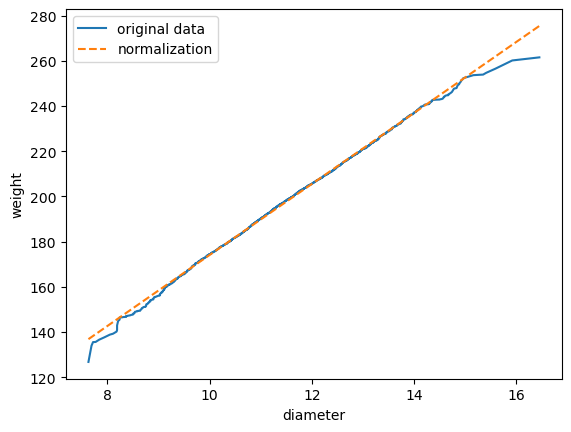

In [60]:
plt.plot(grapefruit_diameter,grapefruit_weight, label='original data')
plt.plot(grapefruit_diameter, y_grapefruit, linestyle = 'dashed', label='normalization')
plt.legend()
plt.xlabel('diameter')
plt.ylabel('weight')
plt.show()

#### Calculando o coeficiente angular utilizando gerador de números aleatórios

##### Coeficiente angular ideal das laranjas/toranjas

In [124]:
np.random.seed(16) # para gerar números aleatórios fixos
ang_coefs = np.random.uniform(1, 5, 100)

b = 17

norm_orange = np.array([])
norm_grapefruit = np.array([])
for i in range(100):
    y_orange = ang_coefs[i] * orange_diameter + b
    y_grapefruit = ang_coefs[i] * grapefruit_diameter + b

    norm_orange = np.append(norm_orange, np.linalg.norm(orange_weight - y_orange))
    norm_grapefruit = np.append(norm_grapefruit, np.linalg.norm(grapefruit_weight - y_grapefruit))

min_index_orange = np.argmin(norm_orange)
print(f'O coeficiente angular ideal para as laranjas é {ang_coefs[min_index_orange]:.5f}')

min_index_grapefruit = np.argmin(norm_grapefruit)
print(f'O coeficiente angular ideal para as toranjas é {ang_coefs[min_index_grapefruit]:.5f}')

O coeficiente angular ideal para as laranjas é 4.91016
O coeficiente angular ideal para as toranjas é 4.91016
